# Berlin Airbnb Data Analysis and Modelling

## Reading in the data and importing the packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('./berlinlistings.csv')
calendar = pd.read_csv('./berlincalendar.csv')

listings.head()

C:\Users\PouyaKholdi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (38,43,61,62,84,85,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20191112224519,2019-11-14,cafeheaven Pberg/Mitte,"Private, bright and friendly room. You'd be sh...","The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh...",none,near all the trendy cafés and flea markets and...,...,f,f,moderate,f,f,1,0,1,0,0.24
1,3176,https://www.airbnb.com/rooms/3176,20191112224519,2019-11-14,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.14
2,3309,https://www.airbnb.com/rooms/3309,20191112224519,2019-11-14,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.35
3,6883,https://www.airbnb.com/rooms/6883,20191112224519,2019-11-14,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08
4,7071,https://www.airbnb.com/rooms/7071,20191112224519,2019-11-14,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,f,f,moderate,f,f,2,0,2,0,2.13


In [2]:
print(listings.shape)
print(calendar.shape)

(24586, 106)
(8973890, 7)


In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1944,2019-11-14,f,$20.00,$20.00,60,120
1,1944,2019-11-15,f,$20.00,$20.00,60,120
2,1944,2019-11-16,f,$20.00,$20.00,60,120
3,1944,2019-11-17,f,$20.00,$20.00,60,120
4,1944,2019-11-18,f,$20.00,$20.00,60,120


## Cleaning the data and preparing for modelling.

### Dropping columns that will not have an impact on the price. 

In [4]:
listings = listings.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'license',
       'jurisdiction_names',
       'calculated_host_listings_count', 'access', 'interaction', 'house_rules', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'is_business_travel_ready'])

### Dropping the prices of listings

In [5]:
listings = listings.drop(columns=['price', 'weekly_price', 'monthly_price'])

### Formatting the price, changing the datatype to float and removing rows with price = 0

(array([1986232., 3136247., 1831367.,  849784.,  388884.,  301799.,
         118907.,  123298.,   37207.,   39454.]),
 array([  8. ,  32.1,  56.2,  80.3, 104.4, 128.5, 152.6, 176.7, 200.8,
        224.9, 249. ]),
 <a list of 10 Patch objects>)

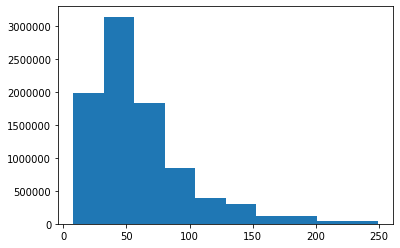

In [6]:
calendar['price'] = calendar['price'].replace('[\$\,]','', regex=True).astype('float')

#Looking for NULL values

calendar['price'].isnull().sum()
#Dropping NULL values.

calendar = calendar.dropna(subset=['price'])

#Looking for 0 values and removing the rows with price = 0.
calendar = calendar[calendar['price'] != 0]

#Dropping all calendar entries with price above 250.
calendar = calendar[calendar['price'] < 250]


plt.hist(calendar['price'])

### Formatting the calendar date

In [7]:
calendar['date'].dtype

#Formatting the date as a date.

calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')

#creating columns for the month and the day of week.
calendar['month'] = calendar['date'].dt.month_name()
calendar["day_of_week"] = calendar['date'].dt.weekday_name

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,day_of_week
0,1944,2019-11-14,f,20.0,$20.00,60,120,November,Thursday
1,1944,2019-11-15,f,20.0,$20.00,60,120,November,Friday
2,1944,2019-11-16,f,20.0,$20.00,60,120,November,Saturday
3,1944,2019-11-17,f,20.0,$20.00,60,120,November,Sunday
4,1944,2019-11-18,f,20.0,$20.00,60,120,November,Monday


### Dropping calendar columns and making the dataframe smaller by dropping duplicates and calculating the mean for listings with the same month and day.

In [8]:
calendar = calendar.drop(columns=['available', 'date', 'adjusted_price', 'minimum_nights', 'maximum_nights'])

#Dropping duplicates and grouping by listing_id, month and day_of_week with a mean price.
calendar = calendar.drop_duplicates().groupby(['listing_id', 'month', 'day_of_week'], as_index=False).mean()

calendar.head()

,listing_id,month,day_of_week,price
0,1944,April,Friday,20.0
1,1944,April,Monday,20.0
2,1944,April,Saturday,20.0
3,1944,April,Sunday,20.0
4,1944,April,Thursday,20.0


### Creating a set of all unique amenities that appear in the amenities.

In [9]:
amenities_list = list(listings.amenities)
amenities_list_string = ' '.join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling hoist',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essent

### Extracting all amenities of all properties into columns.

In [10]:
#Creating a new dataframe with the amenities.
amenities_listings = pd.DataFrame(listings.amenities)

#Creating new columns for every property and every amenitie.
for amen in amenities_set:
    amenities_listings.loc[amenities_listings['amenities'].str.contains(amen), 'amenities_' + amen] = 1

#Dropping the original and nameless amanities columns from both dataframes.
amenities_listings = amenities_listings.drop(columns=['amenities', 'amenities_', 'amenities_translation missing: en.hosting_amenity_49', 'amenities_translation missing: en.hosting_amenity_50'])
listings = listings.drop(columns=['amenities'])

#Replacing all NaN with 0.
amenities_listings = amenities_listings.fillna(0)

amenities_listings.head()

C:\Users\PouyaKholdi\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,amenities_Pocket wifi,amenities_Cleaning before checkout,amenities_Breakfast,amenities_High-resolution computer monitor,amenities_Heated floors,amenities_HBO GO,amenities_Accessible-height toilet,amenities_Paid parking off premises,amenities_Memory foam mattress,amenities_En suite bathroom,...,amenities_Pillow-top mattress,amenities_Handheld shower head,amenities_Cat(s),amenities_Shower chair,amenities_Ceiling hoist,amenities_Amazon Echo,amenities_Game console,amenities_Formal dining area,amenities_EV charger,amenities_Single level home
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Checking every column for the values and the right datatype.

In [11]:
listings['host_response_time'].value_counts()


#Dropping host_response_time.
listings = listings.drop(columns=['host_response_time'])

In [12]:
listings['property_type'].value_counts()
listings['property_type'].isnull().value_counts()

#listings = listings[listings['property_type'] == 'Apartment']

#listings = listings.drop(columns=['property_type'])

False    24586
Name: property_type, dtype: int64

In [13]:
#Formatting the 'host_response_rate' as decimal float.

listings['host_response_rate'] = listings['host_response_rate'].replace('%', '', regex=True).astype('float') / 100

listings[listings['host_response_rate'] == 0].host_response_rate.value_counts()


#Dropping host_response_rate.
listings = listings.drop(columns=['host_response_rate'])

In [14]:
#Dropping the host_acceptance_rate column.

listings['host_acceptance_rate'].unique()
listings = listings.drop(columns=['host_acceptance_rate'])

In [15]:
#Changing the column values into a binary numeric values.

listings['host_is_superhost'] = listings['host_is_superhost'].replace(['t', 'f'], [1, np.nan])


#Dropping host_is_superhost
listings = listings.drop(columns=['host_is_superhost'])

In [16]:
listings['neighbourhood_cleansed'].value_counts()


#Dropping neighbourhood_cleansed
listings = listings.drop(columns=['neighbourhood_cleansed'])

In [17]:
listings['neighbourhood_group_cleansed'].value_counts()

Friedrichshain-Kreuzberg    5869
Mitte                       5074
Pankow                      3898
Neukölln                    3702
Charlottenburg-Wilm.        1804
Tempelhof - Schöneberg      1650
Lichtenberg                  786
Treptow - Köpenick           661
Steglitz - Zehlendorf        507
Reinickendorf                323
Marzahn - Hellersdorf        158
Spandau                      154
Name: neighbourhood_group_cleansed, dtype: int64

In [18]:
#Rounding the longitude and latitude and changing the datatype into string for geo-analysis.

listings.latitude = listings.latitude.round(2).astype('object')
listings.longitude = listings.longitude.round(2).astype('object')

listings['cat_location'] = '(' + listings.latitude.map(str) + ',' + listings.longitude.map(str) + ')'

listings = listings.drop(columns=['latitude', 'longitude'])

In [19]:
#Changing the column values into a binary numeric values.

listings['is_location_exact'] = listings['is_location_exact'].replace(['t', 'f'], [1, np.nan])


#Dropping is_location_exact
listings = listings.drop(columns=['is_location_exact'])

In [20]:
listings['room_type'].value_counts()
listings['room_type'].isnull().value_counts()

False    24586
Name: room_type, dtype: int64

In [21]:
listings['accommodates'].value_counts()
listings['accommodates'].isnull().value_counts()

False    24586
Name: accommodates, dtype: int64

In [22]:
listings['bathrooms'].value_counts()
listings['bathrooms'].isnull().value_counts()

#Has 0 and NaN - I should impute the NaN.

listings['bathrooms'].fillna((listings['bathrooms'].mean()), inplace=True)

In [23]:
listings['bedrooms'].value_counts()
listings['bedrooms'].isnull().value_counts()

#Has 0 and NaN - I should impute the NaN.

listings['bedrooms'].fillna((listings['bedrooms'].mean()), inplace=True)

In [24]:
listings['beds'].value_counts()
listings['beds'].isnull().value_counts()

#Has 0 and NaN - I should impute the NaN.

listings['beds'].fillna((listings['beds'].mean()), inplace=True)

In [25]:
listings['bed_type'].value_counts()
listings['bed_type'].isnull().value_counts()

False    24586
Name: bed_type, dtype: int64

In [26]:
listings['square_feet'].isnull().value_counts()

#Has too many Nulls - I should drop the column.

listings = listings.drop(columns = ['square_feet'])

In [27]:
#Removing special characters and formatting the values as float.

listings['security_deposit'] = listings['security_deposit'].replace('[\$\,]','', regex=True).astype('float')
listings['security_deposit'].value_counts()
listings['security_deposit'].isnull().value_counts()

#Has 0 and NaN - I should replace the NaN with 0.

listings['security_deposit'] = listings['security_deposit'].replace(np.nan, 0)

In [28]:
#Removing special characters and formatting the values as float.

listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$\,]','', regex=True).astype('float')
listings['cleaning_fee'].value_counts()
listings['cleaning_fee'].isnull().value_counts()

#Has 0 and NaN - I should replace the NaN with 0.

listings['cleaning_fee'] = listings['cleaning_fee'].replace(np.nan, 0)

In [29]:
listings['guests_included'].value_counts()
listings['guests_included'].isnull().value_counts()

False    24586
Name: guests_included, dtype: int64

In [30]:
#Removing special characters and formatting the values as float.

listings['extra_people'] = listings['extra_people'].replace('[\$\,]','', regex=True).astype('float')
listings['extra_people'].value_counts()
listings['extra_people'].isnull().value_counts()

False    24586
Name: extra_people, dtype: int64

In [31]:
listings['minimum_nights'].value_counts()
listings['minimum_nights'].isnull().value_counts()

False    24586
Name: minimum_nights, dtype: int64

In [32]:
listings['maximum_nights'].value_counts()
listings['maximum_nights'].isnull().value_counts()

False    24586
Name: maximum_nights, dtype: int64

In [33]:
listings['number_of_reviews'].value_counts()
listings['number_of_reviews'].isnull().value_counts()

False    24586
Name: number_of_reviews, dtype: int64

In [34]:
listings['review_scores_rating'].value_counts()
listings['review_scores_rating'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    20035
True      4551
Name: review_scores_rating, dtype: int64

In [35]:
listings['review_scores_accuracy'].value_counts()
listings['review_scores_accuracy'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    20009
True      4577
Name: review_scores_accuracy, dtype: int64

In [36]:
listings['review_scores_cleanliness'].value_counts()
listings['review_scores_cleanliness'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    20012
True      4574
Name: review_scores_cleanliness, dtype: int64

In [37]:
listings['review_scores_checkin'].value_counts()
listings['review_scores_checkin'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    19991
True      4595
Name: review_scores_checkin, dtype: int64

In [38]:
listings['review_scores_communication'].value_counts()
listings['review_scores_communication'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    20008
True      4578
Name: review_scores_communication, dtype: int64

In [39]:
listings['review_scores_location'].value_counts()
listings['review_scores_location'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    19992
True      4594
Name: review_scores_location, dtype: int64

In [40]:
listings['review_scores_value'].value_counts()
listings['review_scores_value'].isnull().value_counts()

#Has NaN - I should create a dummy_na.

False    19989
True      4597
Name: review_scores_value, dtype: int64

In [41]:
#Changing the column values into a binary numeric values.

listings['instant_bookable'] = listings['instant_bookable'].replace(['t', 'f'], [1, np.nan])
listings['instant_bookable'].value_counts()


#Dropping instant_bookable
listings = listings.drop(columns=['instant_bookable'])

In [42]:
listings['cancellation_policy'].value_counts()


#Dropping cancellation_policy
listings = listings.drop(columns=['cancellation_policy'])

In [43]:
#Changing the column values into a binary numeric values.

listings['require_guest_profile_picture'] = listings['require_guest_profile_picture'].replace(['t', 'f'], [1, np.nan])
listings['require_guest_profile_picture'].value_counts()
listings['require_guest_profile_picture'].isnull().value_counts()


#Dropping require_guest_profile_picture
listings = listings.drop(columns=['require_guest_profile_picture'])

In [44]:
#Changing the column values into a binary numeric values.

listings['require_guest_phone_verification'] = listings['require_guest_phone_verification'].replace(['t', 'f'], [1, np.nan])
listings['require_guest_phone_verification'].value_counts()
listings['require_guest_phone_verification'].isnull().value_counts()


#Dropping require_guest_phone_verification
listings = listings.drop(columns=['require_guest_phone_verification'])

In [45]:
listings['reviews_per_month'].isnull().value_counts()
#listings[listings['reviews_per_month'] == 0]

#Has NaN - I should create a dummy_na.


#Dropping reviews_per_month
listings = listings.drop(columns=['reviews_per_month'])

### Preparing data for modelling.

In [46]:
#Extracting all categorical columns.
cat_listings = listings.select_dtypes(include=["object"])
#Extracting all numerical columns.
num_listings = listings.select_dtypes(include=['float', 'int64'])

#Filling the NULL values of the numerical columns with 0.
num_listings = num_listings.fillna(0)
#One Hot Encoding the categorical columns.
cat_listings_dummies = pd.get_dummies(cat_listings, dummy_na=True)

### Combining the one hot encoded categorical columns with the numerical columns and amenities.

In [47]:
clean_listings = cat_listings_dummies.join(num_listings).join(amenities_listings)

### One hot encoding the calendar columns

In [48]:
calendar = pd.get_dummies(calendar, columns=['month', 'day_of_week'])

calendar.head()

,listing_id,price,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1944,20.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1944,20.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1944,20.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1944,20.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1944,20.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Combining the listings data with the calendar data

In [49]:
listings_calendar = pd.merge(clean_listings, calendar,
                             left_on='id', right_on='listing_id',
                             how='inner', suffixes=('_listings', '_calendar'))

#Dropping the id's of both original dataframes.
listings_calendar = listings_calendar.drop(columns=['id', 'listing_id'])

In [50]:
listings_calendar.shape

(2031952, 1019)

### Checking numerical columns for correlation.

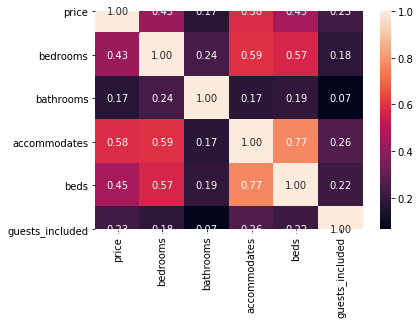

In [51]:
sns.heatmap(listings_calendar[["price",
                "bedrooms", 
                "bathrooms", 
                "accommodates",
                "beds", 
                "guests_included"
                ]].corr(), annot=True, fmt=".2f");

## Modelling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

#Split into explanatory and response variables
X = listings_calendar.drop(columns=['price'])
y = listings_calendar['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
ridge_model = Ridge(normalize = True, fit_intercept=True)

#Fit
ridge_model.fit(X_train, y_train)

#Predict and score the model
y_test_preds_ridge = ridge_model.predict(X_test)
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds_ridge), len(y_test))

'The r-squared score for the model was 0.5669869441916677 on 609586 values.'

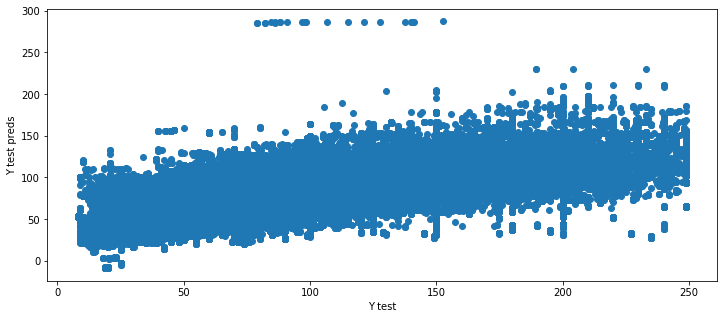

In [53]:
plt.figure(figsize=(12,5))
plt.scatter(y_test, y_test_preds_ridge)
plt.xlabel("Y test")
plt.ylabel("Y test preds")
plt.show()

### Checking the coefficients of the model.

In [54]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['input_variable'] = X_train.columns
    coefs_df['coef'] = ridge_model.coef_
    coefs_df['abs_coef'] = np.abs(ridge_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coef', ascending=False)
    return coefs_df

In [55]:
coef_df = coef_weights(ridge_model.coef_, X_train)

In [56]:
coef_df.head(50)

,input_variable,coef,abs_coef
240,"cat_location_(52.44,13.75)",66.885523,66.885523
201,"cat_location_(52.44,13.18)",56.208419,56.208419
160,"cat_location_(52.43,13.17)",53.121025,53.121025
615,"cat_location_(52.54,13.56)",47.659862,47.659862
532,"cat_location_(52.52,13.54)",39.955407,39.955407
72,"cat_location_(52.39,13.64)",39.315235,39.315235
573,"cat_location_(52.53,13.53)",38.089468,38.089468
22,property_type_Casa particular (Cuba),34.528146,34.528146
318,"cat_location_(52.46,13.61)",-34.109513,34.109513
417,"cat_location_(52.5,13.18)",33.376981,33.376981


## Influence of neighbourhood on price

In [57]:
coef_df[coef_df["input_variable"].str.startswith("neighbourhood_group")].head(15)

,input_variable,coef,abs_coef
7,neighbourhood_group_cleansed_Reinickendorf,-5.293622,5.293622
8,neighbourhood_group_cleansed_Spandau,-3.487530,3.487530
2,neighbourhood_group_cleansed_Lichtenberg,-3.302521,3.302521
11,neighbourhood_group_cleansed_Treptow - Köpenick,-2.835665,2.835665
9,neighbourhood_group_cleansed_Steglitz - Zehlen...,-2.395305,2.395305
3,neighbourhood_group_cleansed_Marzahn - Hellers...,-1.781614,1.781614
5,neighbourhood_group_cleansed_Neukölln,-1.380485,1.380485
4,neighbourhood_group_cleansed_Mitte,1.250079,1.250079
1,neighbourhood_group_cleansed_Friedrichshain-Kr...,1.198029,1.198029
10,neighbourhood_group_cleansed_Tempelhof - Schön...,-0.945438,0.945438


## Influence of amenities on price

In [58]:
coef_df[coef_df["input_variable"].str.startswith("amenities")].head(15)

,input_variable,coef,abs_coef
879,amenities_Firm mattress,25.957185,25.957185
994,amenities_Amazon Echo,22.601136,22.601136
904,amenities_Gas oven,18.317001,18.317001
834,amenities_Electric profiling bed,15.864095,15.864095
965,amenities_Hammock,15.438443,15.438443
953,amenities_Sun loungers,15.438443,15.438443
862,amenities_Beach view,15.438443,15.438443
870,amenities_Mudroom,14.184553,14.184553
829,amenities_HBO GO,14.169512,14.169512
993,amenities_Ceiling hoist,13.301212,13.301212


## Influence of property type on price

In [59]:
coef_df[coef_df["input_variable"].str.startswith("property_type")].head(15)

,input_variable,coef,abs_coef
22,property_type_Casa particular (Cuba),34.528146,34.528146
33,property_type_Houseboat,28.239852,28.239852
17,property_type_Boat,27.032085,27.032085
31,property_type_Hotel,21.297975,21.297975
37,property_type_Pension (South Korea),18.038723,18.038723
18,property_type_Boutique hotel,17.985553,17.985553
13,property_type_Aparthotel,11.318120,11.318120
43,property_type_Treehouse,-10.162487,10.162487
15,property_type_Barn,-9.991001,9.991001
34,property_type_Lighthouse,9.620465,9.620465


## Influence of month on price

In [60]:
coef_df[coef_df["input_variable"].str.startswith("month")]

,input_variable,coef,abs_coef
1002,month_February,-0.735008,0.735008
1008,month_November,-0.642402,0.642402
1003,month_January,-0.365584,0.365584
1004,month_July,0.345677,0.345677
1005,month_June,0.340086,0.340086
1007,month_May,0.330428,0.330428
1010,month_September,0.329201,0.329201
1006,month_March,-0.287483,0.287483
1001,month_December,0.263447,0.263447
1000,month_August,0.254181,0.254181


## Influence of day of week on price

In [61]:
coef_df[coef_df["input_variable"].str.startswith("day_of_week")]

,input_variable,coef,abs_coef
1013,day_of_week_Saturday,0.415689,0.415689
1011,day_of_week_Friday,0.383494,0.383494
1014,day_of_week_Sunday,-0.185771,0.185771
1012,day_of_week_Monday,-0.181395,0.181395
1016,day_of_week_Tuesday,-0.169281,0.169281
1015,day_of_week_Thursday,-0.139163,0.139163
1017,day_of_week_Wednesday,-0.122481,0.122481


## Influence of room type on price

In [62]:
coef_df[coef_df["input_variable"].str.startswith("room_type")].head(15)

,input_variable,coef,abs_coef
47,room_type_Hotel room,16.077588,16.077588
49,room_type_Shared room,-11.446399,11.446399
48,room_type_Private room,-7.928472,7.928472
46,room_type_Entire home/apt,7.819047,7.819047
50,room_type_nan,0.000000,0.000000
